In [1]:
"""Import Statements"""
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_from_json(path: str):
    """Load a JSON object from a file into a variable"""

    with open(path, mode='r', encoding="utf-8") as json_file:
        data = json.load(json_file)
    return data

In [3]:
DIRECTORY_PATH = 'tspset1'

# Get a list of filenames in the directory (excluding subdirectories)
filenames = [filename for filename in os.listdir(DIRECTORY_PATH)
             if os.path.isfile(os.path.join(DIRECTORY_PATH, filename))]

# Sort filenames
filenames.sort(key = lambda name: int(name.replace('tsp_', '').replace('_sol.json','')))

# Read optimal tour lengths from JSON files
opt = []
for filename in filenames:
    opt.append(load_from_json(DIRECTORY_PATH + '/' + filename)['tourlength'])

In [4]:
DIRECTORY_PATH = 'json/'

# Get filenames of heuristics and approximation results
heuristics = {}
filenames = [filename for filename in os.listdir(DIRECTORY_PATH)
             if os.path.isfile(os.path.join(DIRECTORY_PATH, filename))]

for filename in filenames:
    heuristics[filename.replace('.json', '')] = np.array(load_from_json(DIRECTORY_PATH + filename))


In [5]:
# Abbreviation dict for heuristics
heuristic_names = {
    'ni': 'Nearest Insertion',
    'opt': 'Optimal Tourlength',
    'nn': 'Nearest Neighbor',
    'ri': 'Random Insertion',
    'mstheu': 'Minimum Spanning Tree Heuristic',
    'mst': 'Minimum Spanning Tree',
    'lplb': 'LP Relaxation',
    'greedy': 'Greedy Heuristic',
    'fi': 'Farthest Insertion',
    'ci': 'Cheapest Insertion',
    'christo': 'Christofides Heuristik',
    'assrel': 'Assignment Relaxation',
    '1tree': '1 Tree'
}
custom_cmap = {
    0: 'blue',
    1: 'orange',
    2: 'green',
    3: 'red',
    4: 'purple',
    5: 'brown',
    6: 'pink',
    7: 'gray',
    8: 'olive',
    9: 'cyan',
    10: 'black',
    11: 'lawngreen'
}

In [6]:
def heuristics_hist_matrix(data: dict):
    """Print A matrix of histograms that decribe given heuristics"""

    # Get the number of rows and columns for the matrix
    num_rows = 3
    num_cols = 4

    # Create a figure and subplots
    axs = plt.subplots(num_rows, num_cols, figsize=(24, 12))[1]

    # Flatten the axs array to iterate through it easily
    axs = axs.flatten()

    # Iterate over the dictionary and plot histograms
    for i, (array_name, array_data) in enumerate(data.items()):
        axs[i].hist(array_data, bins=20, color = custom_cmap[i], alpha=0.4)
        axs[i].set_title(heuristic_names[array_name])
        axs[i].grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()


    # Show the plot
    plt.show()

## Histograms of Heuristics

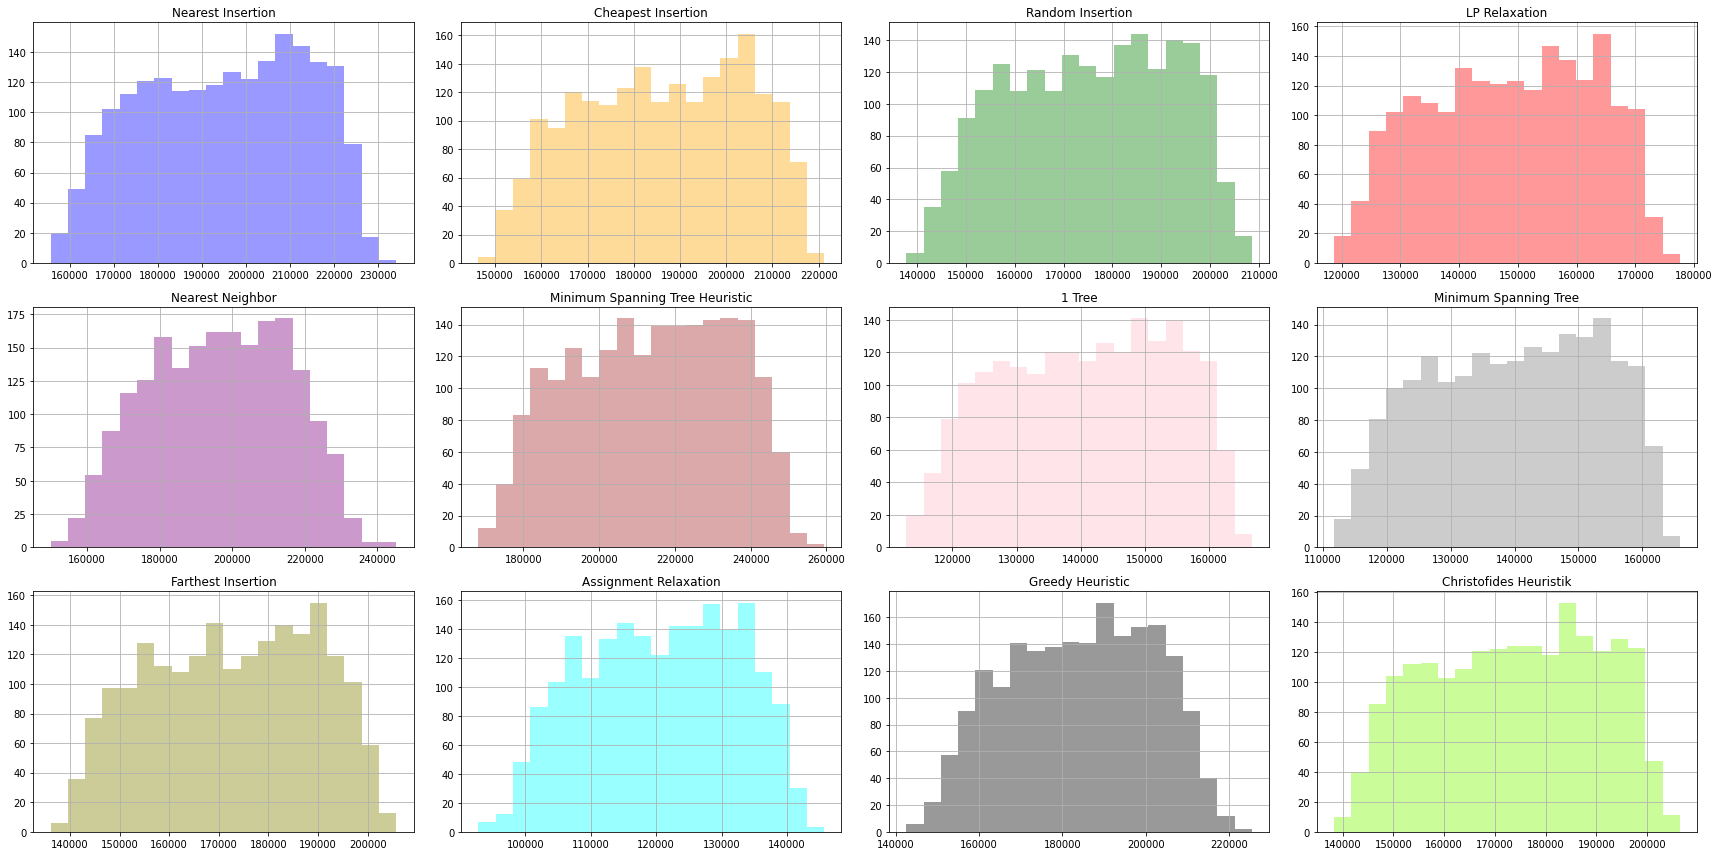

In [7]:
heuristics_without_opt = heuristics.copy()
del heuristics_without_opt['opt']
heuristics_hist_matrix(heuristics_without_opt)

## Histograms of Accuracy of Heuristics in Relation to optimal TSP-Tour

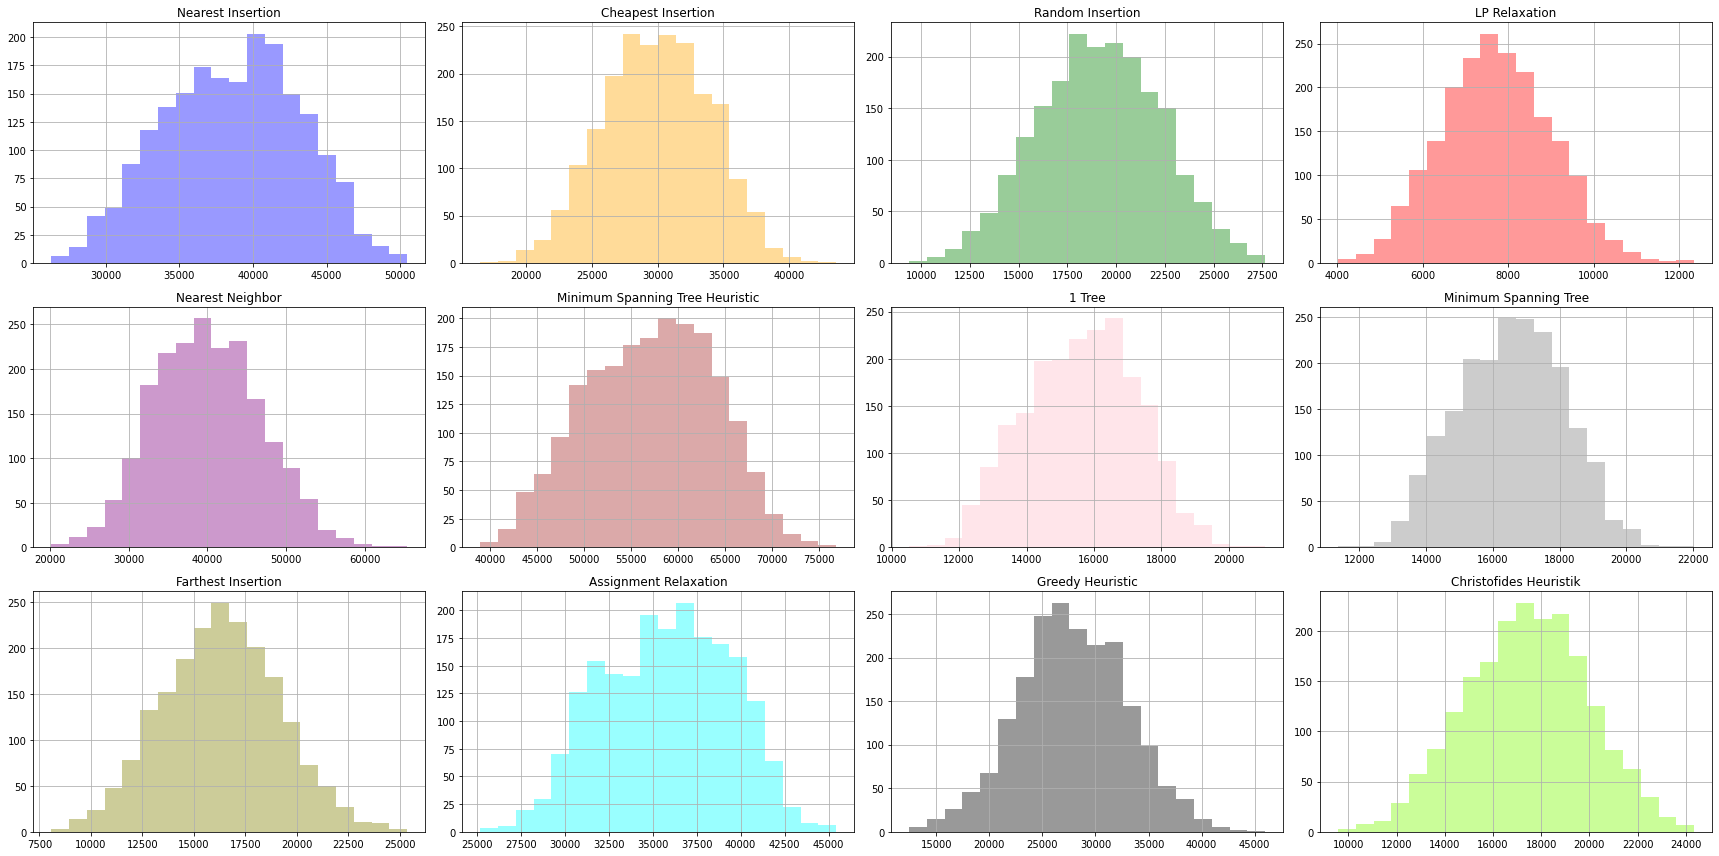

In [8]:
# Find difference of the heuristics to the optimal tour length
distances_from_opt = {}
for key, value in heuristics.items():
    if key == 'opt':
        continue
    distances_from_opt[key] = abs(heuristics['opt'] - value)

heuristics_hist_matrix(distances_from_opt)

## Percentual deviation from optimal tour costs
Note that here negative values indicate that the heuristic is a lower bound while positive values indicate a heuristic to be an approximatio of the problem solution

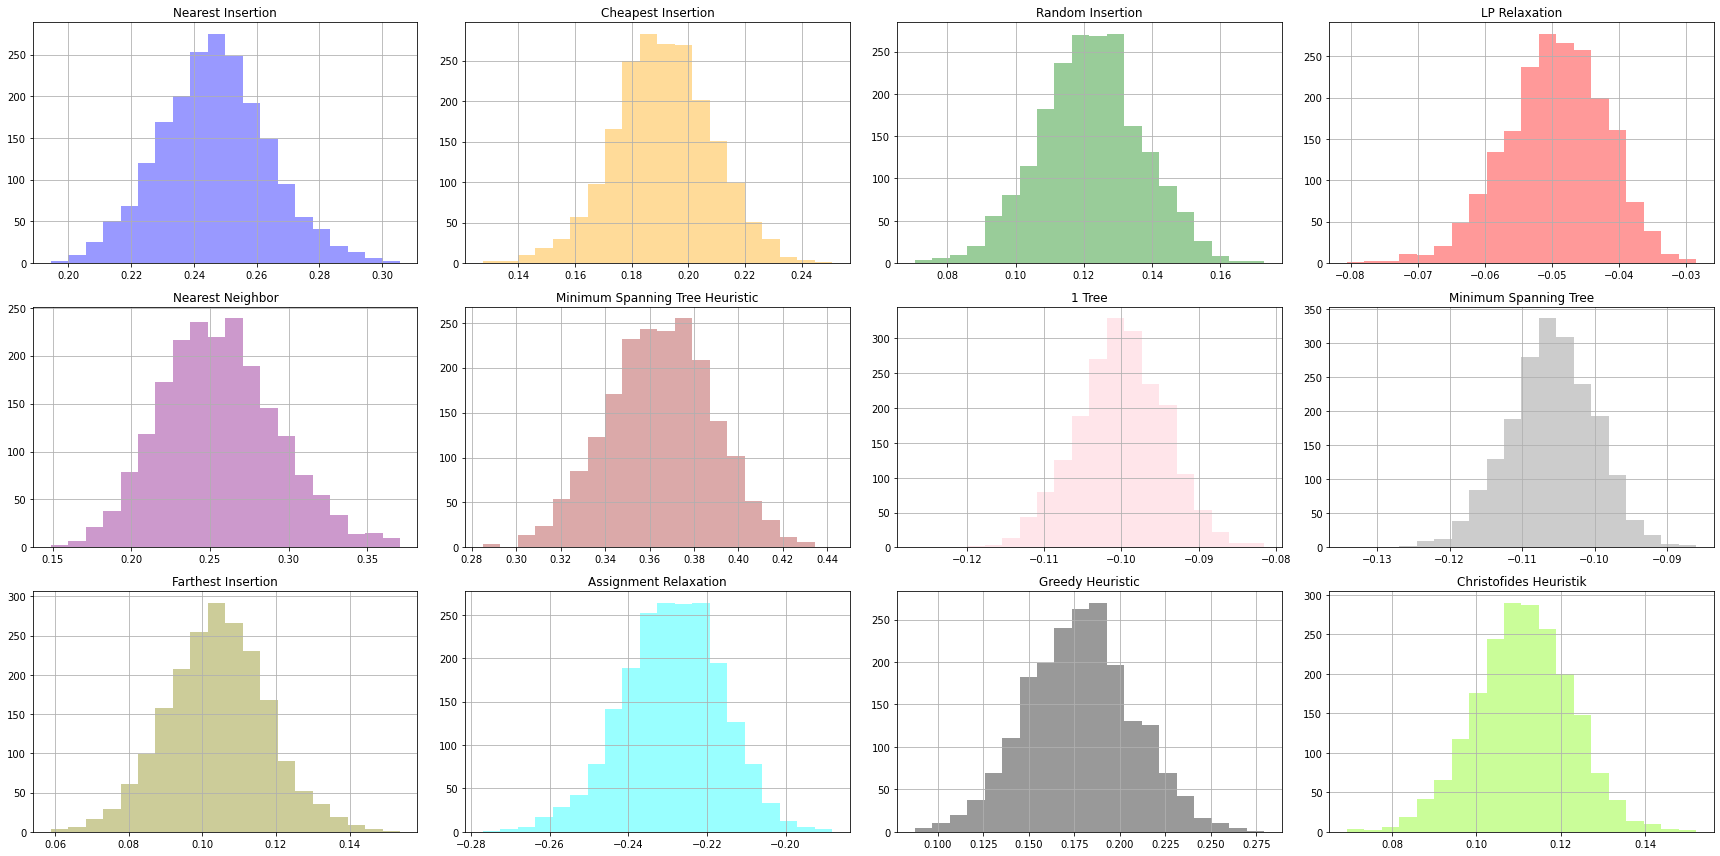

In [13]:
perc_dev_from_opt = {}
for key, value in heuristics.items():
    if key == 'opt':
        continue
    distance = heuristics['opt'] - value
    rel_distance = distance / heuristics['opt']
    perc_dev_from_opt[key] = - rel_distance

heuristics_hist_matrix(perc_dev_from_opt)